## Общие сведения о предмете

Основные задачи геоинформатики:

* создание баз геоданных (геокодирование) и управление ими

* анализ и моделирование геоданных

Логично начать со сбора геоданных. Сейчас большинство данных поступает со спутников. Работе с одним из них посвящена первая лабораторная работа.


## Элементы динамики космического полета: кеплеровы элементы орбиты

Для описания задачи воспользуемся упрощённой моделью - задачей двух тел. Из уравнений Ньютона выводятся такие соотношения, как, например, интегралы движения (см. курс динамики космического полёта). 

Спутник - материальная точка, с пренебрежимо малой по сравнению с планетой массой. Тогда, пренебрегая смещением планеты, можно вывести уравнение движения в полярных координатах:

$$r=\frac{c^2}{\mu + f \cos(\upsilon)} \ \ или \ \ r=\frac{p}{1+e \cos(\upsilon)},$$

где 

$$\large p=\frac{c^2}{\mu},\ \ e=\frac{f}{\mu}.$$ 

Полученные переменные $p$ и $e$ называют **(фокальный) параметр орбиты** и **эксцентриситет** соответственно. 

_Комментарий: на самом деле, корректнее было сказать, что переход был совершен в цилиндрическую систему ($r$, $\upsilon$, $z$), где $z=0$._

Из данных выражений следует, что материальные точки (небесные тела в приближении материальными точками) движутся по коническим сечениям, а также они устанавливают связь между параметрами конического сечения и постоянными первых интегралов, а следовательно, и начальными условиями движения материальных точек. 

При $\upsilon=0$ величина $r$ имеет наименьшее значение; назовем соответствующую ей точку траектории перицентром, наиболее удаленную точку, достигаемую при $\upsilon=\pi$, – апоцентром. При $\upsilon=0$ вектор $\vec{r}$ направлен вдоль вектора $\vec{f}$, поэтому можно говорить, что вектор Лапласа направлен на перицентр. Прямая, совпадающая с большой полуосью орбиты и направленная вдоль вектора Лапласа, называется линией апсид. 

Как следует из получившихся выражений, эксцентриситет определяется модулем вектора Лапласа. При $0\le e<1$ движение происходит по эллипсу; при $e=1$ – по параболе и при $e>1$ – по гиперболе. 

Пользуясь введенной полярной системой координат, найдем первый интеграл, дающий явную связь координат со временем (фактически, это второй интеграл, так как отсутствует зависимость от скорости):

$$\large t-\tau=\frac{p^2}{c}\int_{0}^{\upsilon}\frac{d\upsilon}{\left(1+e \cos\left(\upsilon\right)\right)^2},$$

где $\tau$ – постоянная, именуемая **эпохой** – это момент первого пересечения перицентра движущимся небесным телом. Заметим, что, хотя квадратура формально дает решение задачи, воспользоваться ею при аналитическом изучении движения затруднительно.

(-1.0, 1.0, -1.0, 1.0)

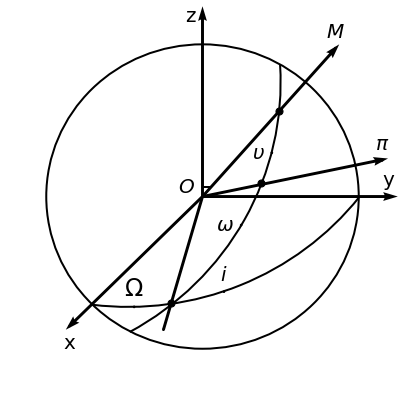

In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(7, 7))

origin = np.zeros(6)

vectors = np.vstack((np.eye(2), [[-0.7, -0.7]], [[0.7, 0.8]], [[0.95, 0.2]], [[-0.2, -0.7]]))
qkeys = ["y", "z", "x", "$M$", "$\\pi$", ""]
qkeys_x, qkeys_y = [0.95, 0, -0.68, 0.68, 0.92, -0.2], [0, 0.95, -0.68, 0.78, 0.19, -0.7]
labelposes = ['N', 'W', 'S', 'N', 'N', 'S']

for o, u, v, q_x, q_y, q_key, lp in zip(origin, vectors[:, 0], vectors[:, 1], 
                                           qkeys_x, qkeys_y, qkeys, labelposes):
    q = ax.quiver(o, o, u, v, angles='xy', scale_units='xy', scale=1, 
                  headaxislength=0 if q_key=='' else 4.5, headlength=0 if q_key=='' else 5)
    ax.quiverkey(q, q_x, q_y, 0, q_key, coordinates='data', fontproperties={'size': 20}, labelpos=lp)
    
ax.quiverkey(q, 0, 0.05, 0.05, "$O$", coordinates='data', fontproperties={'size': 20}, labelpos='W')
    
ax.add_patch(plt.Circle((0, 0), 0.8, color='k', fill=False, lw=2))
ax.add_patch(patches.Arc([-0.38, 0.92], 3., 3., 0, theta1=263, theta2=322, lw=2))
ax.add_patch(patches.Arc([-1.1, 0.6], 3., 3., 30, theta1=269, theta2=333.5, lw=2))

x, y = [-0.16, 0.3, 0.39], [-0.56, 0.07, 0.45]
ax.scatter(x, y, s=50, c='k')

ax.quiverkey(q, -0.35, -0.58, 0, "$\\Omega$", coordinates='data', fontproperties={'size': 24}, labelpos='N')
ax.quiverkey(q, 0.11, -0.5, 0, "$i$", coordinates='data', fontproperties={'size': 20}, labelpos='N')
ax.quiverkey(q, 0.198, -0.15, 0, "$\\omega$", coordinates='data', fontproperties={'size': 20}, labelpos='W')
ax.quiverkey(q, 0.355, 0.23, 0, "$\\upsilon$", coordinates='data', fontproperties={'size': 20}, labelpos='W')

lim = 1
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.axis('off')

Если небесное тело совершает движение вокруг Земли, то в рамках задачи двух тел его траектория согласно первому закону Кеплера будет лежать в некоторой плоскости, проходящей через центр масс Земли (точка $O$). Взяв плоскость $Oxy$, совпадающей с плоскостью земного экватора, рассмотрим дуги больших кругов, получаемые на единичной сфере от сечения ее плоскостью $Oxy$ и плоскостью, в которой происходит движение небесного тела. 

Пусть одна из точек пересечения этих двух кругов лежит в первой четверти плоскости $Oxy$ и пусть этой точке соответствует переход небесного тела из южного полушария в северное. Назовем ее **восходящим узлом орбиты**. Угол между осью $Ox$ и прямой, соединяющей точку $O$ с восходящим узлом, назовем **долготой восходящего узла** и обозначим $\Omega$. Угол между плоскостью экватора и плоскостью траектории небесного тела обозначим $i$ и назовем его **наклонением** орбиты к плоскости экватора. 

Если из центра единичной сферы провести прямые в характерные точки орбиты – перицентр $\pi$ и мгновенное положение небесного тела $M$, то соответствующие углы, отсчитываемые в плоскости орбиты, будут: $\omega$ – **аргумент перицентра**, то есть угловое расстояние перицентра от восходящего узла и $\upsilon$ – **истинная аномалия** – угловое расстояние небесного тела от направления на перицентр. Иногда удобно рассматривать сумму двух последних углов $u=\omega+\upsilon$, носящую название **аргумент широты**.

Углы $\Omega$, $i$ полностью определяют положение плоскости орбиты в инерциальном пространстве, а угол $u$ дает направление на мгновенное положение небесного тела. Если в этом направлении отложить величину радиус-вектора небесного тела, то его положение будет полностью определено. 

Таким образом, движение спутника полностью определяется положением плоскости его орбиты в пространстве (то есть положением этой плоскости относительно выбранной системы координат); формой и размерами орбиты; положением орбиты в плоскости движения; моментом прохождения спутника через его перицентр (или через какую-либо другую, вполне определенную точку орбиты).

Вышеуказанный набор параметров, задающих размеры и форму орбиты небесного тела, расположение орбиты в пространстве и место расположения небесного тела на орбите в задаче двух тел традиционно называют **кеплеровыми элементами орбиты** или **оскулирующими элементами орбиты** (оскулирующая орбита — орбита, которую объект имел бы при отсутствии в дальнейшем каких-либо возмущений).

(-2.3, 2.3, -2.3, 2.3)

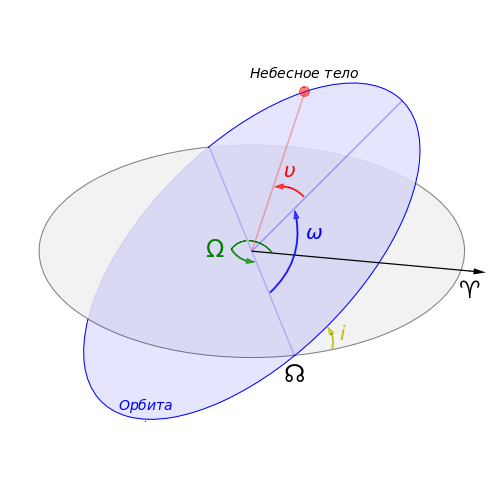

In [2]:
from matplotlib.patches import Arc, Ellipse, FancyArrowPatch

angles = [0, 45]
colors = ['gray', 'blue']
ell_angles = [[90, 22, 292.5], [135, 67.5, 338]]

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'aspect': 'equal'})

for angle, color, ela in zip(angles, colors, ell_angles):
    ax.add_artist(Ellipse((0, 0), 4, 2, angle=angle, color=color, alpha=0.1))
    ax.add_artist(Arc((0, 0), 2, 4, ela[0], ela[1], ela[2] , color=color, lw=1))

ax.plot([-0.4, 0.4], [0.98, -0.98], c='b', alpha=0.2)
ax.plot([0, 0.5], [0, 1.5], c='r', alpha=0.3)
ax.plot([0, 1.414], [0, 1.414], c='b', alpha=0.3)
ax.scatter(0.49, 1.505, s=100, c='r', alpha=0.5)

q = ax.quiver(0, 0, 2.2, -0.2, angles='xy', scale_units='xy', scale=1, width=0.0025, 
          headaxislength=10, headlength=10, headwidth=5)

style = "Simple, tail_width=1, head_width=5, head_length=8"
kw = dict(arrowstyle=style, alpha=0.7)
ax.add_artist(FancyArrowPatch((0.16, -0.4), (0.4, 0.4), connectionstyle="arc3, rad=.3", color='b', **kw))
ax.add_artist(FancyArrowPatch((0.5, 0.5), (0.2, 0.6), connectionstyle="arc3, rad=.3", color='r', **kw))
# TODO get rid of crutch
ax.add_artist(FancyArrowPatch((0.2, -0.025), (-0.045, 0.1), connectionstyle="arc3, rad=.25", color='g'))
ax.add_artist(FancyArrowPatch((-0.035, 0.1), (-0.2, 0.01), connectionstyle="arc3, rad=.25", color='g'))
ax.add_artist(FancyArrowPatch((-0.2, 0.03), (0.045, -0.1), connectionstyle="arc3, rad=.3", color='g', **kw))
ax.add_artist(FancyArrowPatch((0.75, -0.93), (0.7, -0.7), connectionstyle="arc3, rad=.3", color='y', **kw))

ax.quiverkey(q, -0.19, 0.019, 0, "$\\Omega$", coordinates='data', fontproperties={'size': 24}, labelpos='W', labelcolor='g')
ax.quiverkey(q, 0.43, 0.17, 0, "$\\omega$", coordinates='data', fontproperties={'size': 20}, labelpos='E', labelcolor='b')
ax.quiverkey(q, 0.35, 0.6, 0, "$\\upsilon$", coordinates='data', fontproperties={'size': 20}, labelpos='N', labelcolor='r')
ax.quiverkey(q, 0.75, -0.78, 0, "$i$", coordinates='data', fontproperties={'size': 20}, labelpos='E', labelcolor='y')
ax.quiverkey(q, 0.49, 1.54, 0, "$Небесное \ тело$", angle=90, coordinates='data', fontproperties={'size': 14}, labelpos='N')
ax.quiverkey(q, 0.4, -0.98, 0, '$☊$', angle=90, coordinates='data', fontproperties={'size': 24}, labelpos='S')
ax.quiverkey(q, 2.05, -0.19, 0, '$♈︎$', angle=90, coordinates='data', fontproperties={'size': 24}, labelpos='S')
ax.quiverkey(q, -1, -1.6, 0, '$Орбита$', angle=90, coordinates='data', fontproperties={'size': 14}, labelpos='N', labelcolor='b')

ax.set_xlim(-2.3, 2.3)
ax.set_ylim(-2.3, 2.3)

plt.axis('off')

### TLE

Зная данные параметры, можно узнать вектор состояния космического аппарата. Данные об орбитах спутников хранятся в некотором формате, содержащем рассмотренные элементы. Эти данные называются **TLE** — two-line element set или двухстрочный набор элементов — формат данных, представляющий собой набор элементов орбиты для спутника Земли. Нам данный набор интересен тем, что с помощью TLE и местоположения вашей станции наблюдения мы можем вычислить, когда спутник будет в поле видимости и куда направить свою антенну.

Формат TLE был определен командованием воздушно-космической обороны Северной Америки NORAD (North American Aerospace Defense Command) и, соответственно, используется в NORAD, NASA и прочих системах для определения положения интересующих космических объектов. 

TLE периодически обновляются. Еженедельные обновления вполне подходят для большинства спутников. Существенным исключением являются низкоорбитальные аппараты из-за того, что они испытывают значительное аэродинамическое сопротивление, которое в течение нескольких дней приводит к заметным ошибкам. Кроме того, орбиты некоторых спутников периодически изменяются двигателями. Эти факторы требуют более частого обновления для обеспечения точных прогнозов.

Прежде чем перейти к вычислениям положения небесного тела с помощью TLE, давайте рассмотрим подробнее, что из себя представляет данный формат. TLE всегда состоит из двух строк форматированного текста. Кроме того, им может предшествовать строка с названием объекта. Каждое число находится в определенном фиксированном столбце. Пробелы имеют значение. Последняя цифра в каждой строке — это контрольная сумма по модулю 10.

Данные для каждого спутника состоят из строк в следующем формате:

`AAAAAAAAAAA`<br>`1 NNNNNU NNNNNAAA NNNNN.NNNNNNNN +.NNNNNNNN +NNNNN-N +NNNNN-N N NNNNN`<br>`2 NNNNN NNN.NNNN NNN.NNNN NNNNNNN NNN.NNNN NNN.NNNN NN.NNNNNNNNNNNNNN`

Нулевая строка – это имя. На самом деле, есть некоторые разногласия по поводу того, насколько длинным может быть название. Некоторые программы позволяют использовать 12 символов. Другие допускают 24 символа. Кроме того, некоторые источники кодируют дополнительную информацию в этой строке, но это не часть стандартного формата.

Первая строка:

| Столбец | Описание | 
| :-----: | :--- | 
| 01-01   | Номер строки |
| 03-07   | Номер спутника (в базе данных NORAD) |
| 08-08   | Классификация (U = Unclassified — не секретный) |
| 10-11   | Международное обозначение (последние две цифры года запуска) |
| 12-14   | Международное обозначение (номер запуска в году) |
| 15-17   | Международный обозначение (часть запуска) |
| 19-20   | Год эпохи (последние две цифры года) |
| 21-32   | Эпоха (номер дня в году и дробная часть дня) |
| 34-43   | Первая производная среднего движения, деленная на 2 или баллистический коэффициент (в зависимости от типа эфемерид) |
| 45-52   | Вторая производная среднего движения, деленная на 6 (предполагается ведущая десятичная точка) |
| 54-61   | Коэффициент торможения B*, если использовалась общая теория возмущений GP4 (предполагается ведущая десятичная точка), в противном случае – коэффициент радиационного давления |
| 63-63   | Тип эфемерид |
| 65-68   | Номер элемента |
| 69-69   | Контрольная сумма (по модулю 10) |

Чтобы вычислить контрольную сумму, просто сложите значения всех цифр в каждой строке, игнорируя все буквы, пробелы, точки и знаки «плюс», и присвоив всем знакам минус значение «1». Контрольная сумма — это последняя цифра этой суммы.

Вторая строка:

| Столбец | Описание | 
| :-----: | :--- | 
| 01-01   | Номер строки |
| 03-07   | Номер спутника (в базе данных NORAD) |
| 09-16   | Наклонение (градусы) |
| 18-25   | Долгота восходящего узла (градусы) |
| 27-33   | Эксцентриситет (предполагается ведущая десятичная точка) |
| 35-42   | Аргумент перицентра (градусы) |
| 44-51   | Средняя аномалия (градусы) |
| 53-63   | Среднее движение (обороты в день) |
| 64-68   | Номер витка на момент эпохи |
| 69-69   | Контрольная сумма (по модулю 10) |

### Упрощенные модели возмущений и системы пространственной привязки

Теперь, когда вы знаете, как расшифровывается формат TLE, разберемся с тем, как им воспользоваться. TLE является входными данными для так называемых упрощенных моделей возмущений (simplified perturbations models) – математических моделей, используемых для расчета векторов положения и скорости космических аппаратов относительно центрированной на Земле инерциальной системы координат. То есть, используя TLE и данную модель можно вычислить относительно точные положение и скорость спутника в определенное время.

Упрощенные модели возмущений представляют собой набор из пяти математических моделей – SGP, SGP4, SDP4, SGP8 и SDP8. Эти модели предсказывают влияние возмущений, вызванных формой Земли, сопротивлением, излучением и гравитацией других тел, таких как Солнце и Луна. SGP расшифровывается как «Simplified General Perturbations» или «упрощенные общие возмущения», а SDP – «Simplified Deep Space Perturbations» или «упрощенные возмущения дальнего космоса». То есть их разница заключается в том, к каким объектам они применяются: SGP применимы к околоземным объектам, а SDP применимы к объектам в дальнем космосе. Разделение происходит по периоду обращения – 225 минут, что соответствует высоте 5 877,5 км при условии круговой орбиты. Таким образом, выбрать модель вы можете, используя значение среднего движения из TLE. Цифры же после аббревиатур определяют форму уравнений решения гравитационной и атмосферной моделей. Желающие разобраться с деталями, могут обратиться к докладу [«SPACETRACK REPORT NO. 3»](https://celestrak.com/NORAD/documentation/spacetrk.pdf) и [комментариям к нему](https://celestrak.com/publications/AIAA/2006-6753/AIAA-2006-6753.pdf). Подробный алгоритм работы каждой из названных моделей можно найти в том же докладе. 

Как уже упоминалось, при использовании модели SGP, на выходе получается вектор состояния КА относительно центрированной на Земле инерциальной системы координат. Положение антенны же мы знаем в географической системе координат. 
Географические координаты, как вы уже могли догадаться, являются разновидностью сферических, а вернее, эллиптических. И связь между декартовыми ($X$, $Y$, $Z$) и эллипсоидальными координатами ($\phi$, $\lambda$ и $h$) хорошо известна:

$$X=(N+h)\cos\phi\cos\lambda, \ Y=(N+h)\cos\phi\sin\lambda, \ Z=\left(\frac{b^2}{a^2}N+h\right)\sin\phi, \ N=\frac{a^2}{\sqrt{a^2\cos^2\phi+b^2\sin^2\phi}},$$

где $N$ – так называемый «радиус кривизны первого вертикала», $a$ и $b$ – полуоси эллипсоида (экваториальная и полярная). В геодезии первым вертикалом в какой-либо точке поверхности эллипсоида называется сечение эллипсоида плоскостью, проходящей через нормаль к поверхности эллипсоида в этой точке и перпендикулярной к плоскости меридиана.

Система отсчета, связанная с Землей, в которую мы переводим географические координаты с помощью указанных преобразований, определяется тремя осями, где ось $Z$ совпадает с осью вращения Земли (направлена на север вдоль оси вращения Земли), ось $X$ связана с гринвичским меридианом (указывает на точку пересечения экваториальной плоскости Земли и Гринвичского меридиана), ось $Y$ ортогональна осям $Z$ и $X$ и завершает правую тройку (указывает на $90^{\circ}$ к востоку от оси $Х$ в экваториальной плоскости), а ее начало зафиксировано в центре Земли. Такая система координат также называется **ECEF (Earth Centered Earth-Fixed)**. ECEF неинерциальна и вращается вместе с Землей. Следовательно, теперь необходимо перевести полученные координаты в инерциальную систему координат.

Инерциальная система координат **ECI (Earth Centered Inertial)** называется так потому, что ось $Х$ указывает, независимо от вращения Земли, в сторону неподвижных звезд (то есть инерциальная система координат не вращается), ось $Y$ указывает на $90^{\circ}$ к востоку от оси $X$ в экваториальной плоскости, а ось $Z$ указывает на север вдоль оси вращения Земли. 

_Комментарий: звезды, выбранные для направления оси $Х$, на самом деле являются только «квази»-неподвижными, поскольку технически ось указывает в направлении Солнца в момент весеннего равноденствия и, таким образом, подвержена прецессии Земли. Точку весеннего равноденствия, первого дня весны в северном полушарии, часто называют первой точкой Овна или Эреса. Астрономически вектор, соединяющий Землю и Солнце в этот день, дает направление в пространстве точки весеннего равноденствия. Это направление обозначается с помощью символа "таран" $♈︎$._

Таким образом, зная географические координаты наблюдателя и TLE космического аппарата, используя, например, описанные выше преобразования ("например", потому что приведен один из вариантов), можно привести их к одной системе координат (ECI или ECEF в описанном варианте) и получить прогноз видимости.

**На следующем занятии будет лабораторная работа. Поэтому дома рекомендую посмотреть, какие библиотеки Python используются для прогнозирования и рассчета положений спутников.**